In [2]:
import pandas as pd
import re

In [3]:
#import table
df1 = pd.read_csv(r'DDR_with_salary.csv')
df1.head(2)

,Title,Location,Company,Score,Salary,Post_Date,Synopsis,Low,High
0,Data Scientistnew,Remote,L2 Solutions,None,100000 - 175000 a year,Today,Demonstrated experience applying data science ...,100000,175000.0
1,Data Scientist,"San Mateo, CA 94401 (Central Business District...",Photomath,None,160000 - 170000 a year,30+ days ago,Advanced knowledge of one or more of other mai...,160000,170000.0


In [4]:
#get average salary
df1['Average'] = df1[['Low', 'High']].mean(axis=1)

In [5]:
df_state = df1['Location'].str.split(",", expand=True).rename({0: 'City_name', 1: 'State'}, axis=1)
df1_new = df1.join(df_state)

df_state_initial = pd.DataFrame(df1_new['State'].str.split(' ').str[1])
df_state_initial.columns = ['State_initial']
df1_new = df1_new.join(df_state_initial)

df1_new.head(5)

,Title,Location,Company,Score,Salary,Post_Date,Synopsis,Low,High,Average,City_name,State,State_initial
0,Data Scientistnew,Remote,L2 Solutions,None,100000 - 175000 a year,Today,Demonstrated experience applying data science ...,100000,175000.0,137500.0,Remote,None,None
1,Data Scientist,"San Mateo, CA 94401 (Central Business District...",Photomath,None,160000 - 170000 a year,30+ days ago,Advanced knowledge of one or more of other mai...,160000,170000.0,165000.0,San Mateo,CA 94401 (Central Business District area),CA
2,Data Scientist,Remote,ForMotiv,None,75000 - 120000 a year,30+ days ago,Experience with SQL and data manipulation.Assi...,75000,120000.0,97500.0,Remote,None,None
3,Data Scientist,"San Francisco, CA",Change Research,4.5,90000 - 130000 a year,30+ days ago,"Strong SQL and R skills, as a way to engage wi...",90000,130000.0,110000.0,San Francisco,CA,CA
4,Statistician (Data Scientist)new,"Atlanta, GA 30329",Centers for Disease Control and Prevention,4.2,97078 - 126202 a year,Today,"Identify relevant data available, including in...",97078,126202.0,111640.0,Atlanta,GA 30329,GA


In [6]:
df1_new = df1_new.drop(columns=['Salary','Location','State'])

In [7]:
median = df1_new['Average'].median()
print ('median salary: $' + str(median))

median salary: $78250.0


In [8]:
def f(row):
    if row >= median:
        return 1
    else:
        return 0
df1_new['above'] = df1_new['Average'].apply(f)
df1_new.head(3)

,Title,Company,Score,Post_Date,Synopsis,Low,High,Average,City_name,State_initial,above
0,Data Scientistnew,L2 Solutions,None,Today,Demonstrated experience applying data science ...,100000,175000.0,137500.0,Remote,None,1
1,Data Scientist,Photomath,None,30+ days ago,Advanced knowledge of one or more of other mai...,160000,170000.0,165000.0,San Mateo,CA,1
2,Data Scientist,ForMotiv,None,30+ days ago,Experience with SQL and data manipulation.Assi...,75000,120000.0,97500.0,Remote,None,1


In [9]:
df1_new['above'].value_counts()
#exactly 50/50

1    71
0    71
Name: above, dtype: int64

In [10]:
df1_new['Score'].replace(to_replace='None', value=0, inplace=True)

In [11]:
#df_more['Score'].fillna(0, inplace=True)

In [12]:
df1_new.head()

,Title,Company,Score,Post_Date,Synopsis,Low,High,Average,City_name,State_initial,above
0,Data Scientistnew,L2 Solutions,0,Today,Demonstrated experience applying data science ...,100000,175000.0,137500.0,Remote,None,1
1,Data Scientist,Photomath,0,30+ days ago,Advanced knowledge of one or more of other mai...,160000,170000.0,165000.0,San Mateo,CA,1
2,Data Scientist,ForMotiv,0,30+ days ago,Experience with SQL and data manipulation.Assi...,75000,120000.0,97500.0,Remote,None,1
3,Data Scientist,Change Research,4.5,30+ days ago,"Strong SQL and R skills, as a way to engage wi...",90000,130000.0,110000.0,San Francisco,CA,1
4,Statistician (Data Scientist)new,Centers for Disease Control and Prevention,4.2,Today,"Identify relevant data available, including in...",97078,126202.0,111640.0,Atlanta,GA,1


# Machine learning model

In [13]:
#from sklearn.externals.six import StringIO 
from six import StringIO
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

In [14]:
#Creating dummies for state and cities

In [15]:
#city dummies
df_city_dummy = pd.get_dummies(df1_new['City_name'])
df_city_dummy.head()

,Alameda,Atlanta,Bellevue,Bingham Farms,Boulder,Broomfield,Chicago,Cincinnati,Columbia,Dallas,...,San Jose,San Juan,San Mateo,Saratoga Springs,Seattle,Silver Spring,The Woodlands,United States,Washington,York
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#state dummies
df_state_dummy = pd.get_dummies(df1_new['State_initial'])
df_state_dummy.head()

,CA,CO,CT,DC,GA,IL,MD,MI,MO,ND,...,NY,OH,OR,PA,PR,TN,TX,UT,VA,WA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Creating bigrams from synposis data using count vectorizer

In [18]:
#job title 
from sklearn.feature_extraction.text import CountVectorizer
words = CountVectorizer(stop_words='english', max_features=30, ngram_range=(2,2))
vector = words.fit_transform(df1_new['Title'].values)

job_title  = pd.DataFrame(vector.todense(), columns=words.get_feature_names())
print (job_title.shape)
job_title.head()

(142, 30)


,agile business,analyst data,analyst senior,associate data,behavior analyst,board certified,business analyst,business analystnew,business data,business intelligence,...,level business,morgan hill,program analystnew,programmer data,scientist business,scientist engineer,senior business,senior data,systems analystnew,users productsnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#synopsis
synopsis = CountVectorizer(stop_words='english', max_features=50)
synopsis_vector = synopsis.fit_transform(df1_new['Synopsis']).toarray()
df_synopsis  = pd.DataFrame(synopsis_vector, columns=synopsis.get_feature_names())
print (df_synopsis.shape)
df_synopsis.head()

(142, 50)


,ability,analysis,analyst,analyze,building,business,create,data,decisions,define,...,support,systems,team,techniques,time,understanding,using,work,working,years
0,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#combine all dummies
dummy = pd.concat([job_title, df_city_dummy, df_state_dummy,df_synopsis,df1_new['Score']], axis=1)
dummy.head()

,agile business,analyst data,analyst senior,associate data,behavior analyst,board certified,business analyst,business analystnew,business data,business intelligence,...,systems,team,techniques,time,understanding,using,work,working,years,Score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.2


# Test -1 RandomForest

In [37]:
model = RandomForestClassifier(n_estimators=100, oob_score=True)
y = df1_new['above']
cv = cross_val_score(model, dummy, y, cv=4)

model.fit(dummy, y)

print('CV scores:',cv)
print('Average accuracy:',cv.mean())


importance_dataframe = pd.DataFrame(model.feature_importances_, index = dummy.columns, columns=['importance']).sort_values('importance', ascending=False)
importance_dataframe.head(10)

CV scores: [0.69444444 0.55555556 0.6        0.51428571]
Average accuracy: 0.5910714285714286


,importance
data scientist,0.047090
Score,0.046023
data,0.042185
experience,0.031496
business,0.026282
stakeholders,0.025871
Remote,0.020923
entry level,0.020604
None,0.019088
team,0.016904


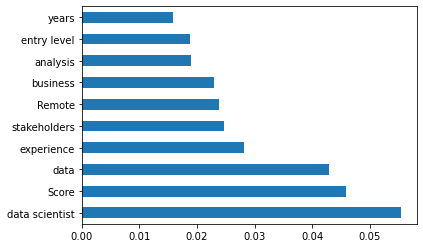

In [38]:
#plot feature importance
y = df1_new['above']

model = RandomForestClassifier(n_estimators=100, oob_score=True)
model.fit(dummy, y)

(pd.Series(model.feature_importances_, index=dummy.columns)
   .nlargest(10)
   .plot(kind='barh'))        # some method chaining, because it's sexy!

# Test-2 Logistic Regression

In [44]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression()
score = cross_val_score(log_reg, dummy, y, cv=4)

log_model = log_reg.fit(dummy, y)

print ('CV scores:', score)
print ('Average accuracy:', score.mean())

CV scores: [0.69444444 0.63888889 0.48571429 0.48571429]
Average accuracy: 0.5761904761904761


In [45]:
importance = log_model.coef_[0]
importance_dataframe = pd.DataFrame(importance, index = dummy.columns, columns=['importance']).sort_values('importance', ascending=False)
importance_dataframe.head(20)

,importance
data scientist,1.351494
stakeholders,1.217987
senior business,0.933844
modeling,0.791447
senior data,0.761172
agile business,0.727374
data scientistnew,0.722980
erp business,0.682989
experience,0.636141
program analystnew,0.619822


# Test-3 Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
#Tune Classifier - different learning rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=1, random_state=0)
    gb_clf.fit(dummy,y)
    gb_model = cross_val_score(gb_clf, dummy, y, cv=4)

    print("Learning rate: ", learning_rate)
    print ('CV scores:', gb_model)
    print ('Average accuracy:', gb_model.mean())

Learning rate:  0.05
CV scores: [0.63888889 0.58333333 0.57142857 0.51428571]
Average accuracy: 0.5769841269841269
Learning rate:  0.075
CV scores: [0.63888889 0.58333333 0.57142857 0.51428571]
Average accuracy: 0.5769841269841269
Learning rate:  0.1
CV scores: [0.63888889 0.61111111 0.57142857 0.51428571]
Average accuracy: 0.5839285714285714
Learning rate:  0.25
CV scores: [0.63888889 0.58333333 0.6        0.54285714]
Average accuracy: 0.5912698412698413
Learning rate:  0.5
CV scores: [0.66666667 0.58333333 0.51428571 0.54285714]
Average accuracy: 0.5767857142857142
Learning rate:  0.75
CV scores: [0.61111111 0.63888889 0.54285714 0.54285714]
Average accuracy: 0.5839285714285714
Learning rate:  1
CV scores: [0.69444444 0.58333333 0.51428571 0.6       ]
Average accuracy: 0.598015873015873


In [26]:
#learning rate = 1
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_features=2, max_depth=1, random_state=0)
gb_clf2.fit(dummy,y)
gb_model2 = cross_val_score(gb_clf, dummy, y, cv=4)

In [27]:
print ('CV scores:', gb_model2)
print ('Average accuracy:', gb_model2.mean())

CV scores: [0.69444444 0.58333333 0.51428571 0.6       ]
Average accuracy: 0.598015873015873


In [50]:
#feature importance
feature_importance = gb_clf2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx
rslt = sorted_idx[-10:] 
pos = np.arange(rslt.shape[0]) + .5

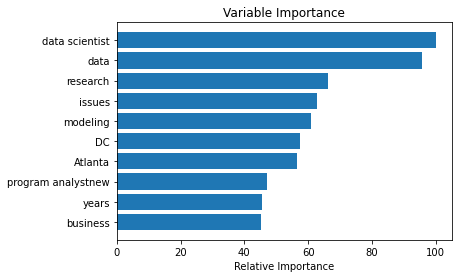

In [29]:
#plot top 10 feature importance
plt.barh(pos, feature_importance[rslt], align='center')
plt.yticks(pos, dummy.keys()[rslt])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [44]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(dummy, approximate=False, check_additivity=False)

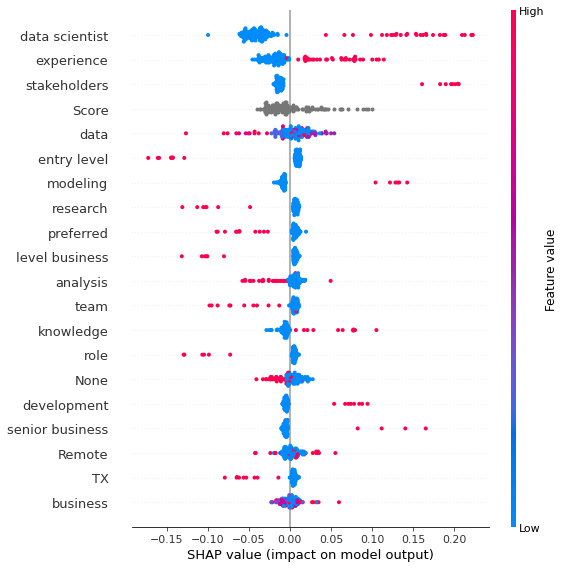

In [43]:
shap.summary_plot(shap_values[1], dummy)